
<h1 align="center">Ensembling</h1> 

## Program so far

- Linear Regression
- Logistic Regression
- Decision Trees

## Agenda

- What is ensembling?
- Types of ensembling
- Naive aggregation or voting
- Bootstrap Aggregating or Bagging
- Stacking


## Lucius goes to John
***
Lucius goes on a pilot trip to visit certain universities in Brooklyn. On his way back he decided to pay a visit to John. He got a six-pack of Heineken a rushed to John's place.

A much more confident John, played an excellent host to Lucius. While discussing, Lucius discussed a few issues that he was facing. Lucius was through with Decision Trees, but being an Applied Math enthusiast, he was not satisfied with the result. ("You know how they are!") He was wondering if anything better could be done.

John invited Jay over as he lived only a couple of blocks away.

## Jay Helps
***
Jay patiently paid an ear to Lucius's problem, and beamed with excitement, **what's better than one learner? -- multiple learners!**

Let's understand more, but before that, let's get over with the routine stuff.

In [1]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('../data/loan_prediction.csv')
dataframe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


Split the original data into train & test data, with the column `Loan Status` as the target variable.

In [2]:
from sklearn.model_selection import train_test_split

X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## More is better than one! (1/2)
***
The idea of **the wisdom of crowds** has been popular since as far back we go, and for a reason. It has been found that the collective intelligence of many often surpasses the intelligence of a single expert.

So we don't need to be experts to understand that using multiple learners to make predictions would help!

## More is better than one! (2/2)
***

Methods of improving model performance by aggregating predictions over several learners are known as **ensemble methods.** Ensembling helps improvise on the stability and predictive power of the model.

Ensemble modeling is a powerful way to improve the performance of your model. It usually pays off to apply ensemble learning over and above various models you might be building. 

## Introduction to Ensemble Methods
***
Let's explore this technique of Ensembling using a philosophical thought process.

#### Condorcet’s Jury Theorem
Let's say a jury of voters need to make a decision regarding a binary outcome (for example to convict a defendant or not).

If each voter has a probability p of being correct and the probability of a majority of voters being correct is L, then **L > p if p > 0.5** if the voters as independent from each other. Interestingly, **L approaches 1 as the number of voters approaches infinity**.

## Introduction to Ensemble Methods

#### Condorcet’s Jury Theorem

In human language, p > 0.5 means that the individual judgments (votes) are at least a little better than random chance.

Now, let's take this analogy to the world of ML:

* Verdict --> classification prediction
* Jury members --> ML models
* votes --> individual predictions

This means that employing multiple ML models should improve the performance according to the Condorcet's theorem, and it does!

## Building an intuition (1/2)

Let's say I am interested in buying the new iphone model since I have an extra kidney anyway.

However, I am not sure if it is a good model or not. So I ask a bunch of people

1. A mobile shopkeeper, whose opinions about a mobile phone model are 80% times correct
2. A YouTube gadget reviewer, who is 70% times correct in her opinions about a gadget
3. My friend, who is 60% of times correct

## Building an intuition (2/2)

I decide that I will buy the phone if all of them recommend it, and all of them do! In such a case, what is the probability of the new phone turning out to be a bad model?

It will be same as the probability of all of them being wrong simultaneously 

>* P = (1 - 0.8) x (1 - 0.7) x (1 - 0.6)
>* P = 0.024

Which means that there is 97.6% chance that the phone will be good, given their opinions are independent from each other.

Ensemble works on similar principles.

## Strong Learners vs Weak Learners

We discussed how we only need a large number of learners, whose predictive power is just slightly better than random chance (tossing a coin in case of binary classification problem!) for ensembling to work. Such learners have a special name -- "weak learners".

* **Weak Learner:**
Given a labeled dataset, a Weak Learner produces a classifier which is at least a little more accurate than random classification.
* **Strong Learner:**
We call a machine learning model a Strong Learner which, given a labeled dataset, can produce a classifier to arbitrary accuracy.

## Ensemble of Weak Learner
Given the formulation above, the question we want to ask is this:
      
**Can an ensemble of weak classifiers produce a single strong classifier?**

## Ensemble of Wise Learners (1/2)

To build ensemble models, we combine multiple models using different methods and hope that the wisdom of the crowd outperforms any individual model. 

Naturally, not all crowds are wise (for example, greedy investors of a stock market bubble). 

## Ensemble of Wise Learners (2/2)

**Surowiecki** presents a simple framework to evaluate if a given crowd is wise:
* **Independence :** Members’ opinions are not determined by the opinions of those around them.
* **Diversity of opinion :** Each member should have private information even if it is just an eccentric interpretation of the known facts.
* **Decentralization :** Members are able to specialize and draw conclusions based on local knowledge.
* **Aggregation :** Some mechanism exists for turning private judgments into a collective decision.

Surowiecki's framework helps us make sure that the ensemble of ML learners improve overall performance by

* Decreasing the variance 
* Decreasing the bias
* Improving the predictive force

## How Ensemble Method Work
***
Lucius, being in a hurry was keen to jump on how to do things rather than fundamental concepts.

## So How does Ensemble Method Work
***
Every ensemble algorithm consists of two steps:

* Producing a cohort of predictions using simple ML algorithms.
* Combining the predictions into one "aggregated" model.

Ensemble can be achieved through several techniques. 

## Back to Lucius
***
As Lucius has a background of applied maths, he has built a strong intuition over the years. Lucius pointed out that the most obvious and intuitive way would be to average out all the possibilities and that would be the final output. Indeed, it was.

He was referring to an ensemble method called **Aggregation** or **Voting Ensemble**. 

## Naive Aggregation
***
Naive aggregation works by aggregating the final output through averaging (regression) or voting (classification).

- A more sophisticated ensemble might assign weights to the predictions by different learners while aggregating.

- Works best with algorithms which learn very differently from each other, thereby complementing each others' decisions

**Brain teaser :**
When does a voting classifier out do its base learner and when it doesn’t?

## Soft Voting vs Hard Voting

Since, every classification algorithm first calculates the probabilities of each outcome, and them produces the prediction, the aggregation could be done either on calculated probabilities, or final predictions.

* In **hard voting**, the voting classifier takes majority of its base learners’ predictions
* In **soft voting**, the voting classifier takes into account the probability values by its base learners 

In general, Soft voting has been observed to perform better than hard voting.

Let's apply Soft Voting and Hard Voting on the loan prediction dataset. We can pass in a number of classifiers to it. We also check the accuracy by both these methods. We will be using the `VotingClassifier` class in sklearn.

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
decision_clf1 = DecisionTreeClassifier()
decision_clf2 = DecisionTreeClassifier()

In [4]:
# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'hard')

voting_clf_hard.fit(X_train, y_train)
y_pred_hard = voting_clf_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)

In [5]:
# Soft Voting
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                 ('Decision Tree 1', decision_clf1),
                                                 ('Decision Tree 2', decision_clf2)],
                                   voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred_soft = voting_clf_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

In [6]:
print "Hard voting accuracy: %.4f" %(accuracy_hard)
print "Soft voting accuracy: %.4f" %accuracy_soft

Hard voting accuracy: 0.6811
Soft voting accuracy: 0.6919


## The idea of specialists:

Jay was thinking silently the whole time. After a while, he said, **what could better than the wisdom of crowds? --> wisdom of diverse experts!**.

This reminded him of the *mantri mandal* of the kings in the older times, where each minister used be an expert of a particular area and the king would ask for opinions from them before taking any major decisions.

Unknowingly, Jay was stumbling over a technique called **Bagging**.

## Example (1/2)

Let’s understand this idea better through an example of a multi-speciality hospital. Let’s say the hospital has 3 medical interns which the management can train. Moreover, the hospital deals with 3 types of cases: 
* Heart diseases
* Broken bones
* Cancer

Now, the management has 2 ways in which they can be trained:
* All the interns handle all types of cases 
* Each intern handle a specific type of case

## Example (2/2)

If the management chooses option 1, they will create 3 doctors who can take care of a wide range of cases but since their exposure to each type of case is limited, they will be generalists: MBBS doctors

On the other side, if the management lets each intern work on a single category of cases, they can become specialists in their respective areas: A cardiologist, an orthopedist and an oncologist.

**Similarly, in bagging, by training each base learner on different sample of data, we make specialist base learners.**

## Bagging

Bagging stands for **B**ootstrap **Agg**regat**ing**.

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. 

Unlike naive aggregator, bagging uses a single type of base learner. Bagging is a method that involves manipulating the training set by resampling. We learn k base classifiers on k different samples of training data.

## The B in Bagging -- Bootstrapping

* The samples are independently created by resampling the training data using uniform weights

* This means that the sampling of data points happens with replacement. The process of **sampling with replacement is called Bootstrapping.**

## Bias - Variance trade-off

Because of bootstrapping, each individual predictor has **a higher bias** than if it were trained on the original training set. 

However, a large number of such biases will cancel each other out when aggregated, hence the bias of the resulting bagging is only slightly higher than a comparable single predictor strong learner. 

At the same time, because bagging provides a way to reduce overfitting, the variance of resulting strong learner reduced significantly.

Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

## Bagging reduces Variance
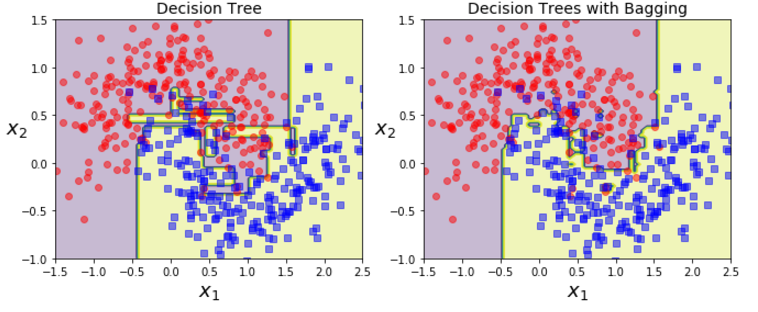

## And bagging is practical!

* The learners can all be trained in parallel, via different CPU cores or even different servers. 
* Similarly, predictions can be made in parallel. 
* This is one of the reasons why bagging ensembles are such popular methods: **they scale very well.**

Now, lets apply Bagging to the above dataset.
We will compare the accuracy of a single learner against an Ensemble of learners.

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression()
decision_clf = DecisionTreeClassifier()

# Fitting single decision tree
decision_clf.fit(X_train, y_train)
y_pred_decision = decision_clf.predict(X_test)
score_dt = accuracy_score(y_test, y_pred_decision)

In [8]:
# Fitting single decision tree
log_clf.fit(X_train, y_train)
y_pred_decision = log_clf.predict(X_test)
score_lr = accuracy_score(y_test, y_pred_decision)

In [9]:
# Fitting bagging classifier with Logisitc Regression
bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_train, y_train)
y_pred_bagging = bagging_clf1.predict(X_test)
score_bc_lr = accuracy_score(y_test, y_pred_bagging)

In [10]:
# Fitting bagging classifier with Logisitc Regression
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf2.fit(X_train, y_train)
y_pred_bagging = bagging_clf2.predict(X_test)
score_bc_dt = accuracy_score(y_test, y_pred_bagging)

In [11]:
print "decision tree accuracy %.4f" %(score_dt)
print "bagging classifier (decision tree) accuracy %.4f" %(score_bc_dt)
print "======================================"
print "logistic regression accuracy %.4f" %(score_lr)
print "bagging classifier (logistic regression) accuracy %.4f" %(score_bc_lr)

decision tree accuracy 0.6541
bagging classifier (decision tree) accuracy 0.7676
logistic regression accuracy 0.7730
bagging classifier (logistic regression) accuracy 0.7730


We can easily observe that the accuracy of a BaggingClassifier is much better then that of a single decision tree, but not in case of logistic regression, why? -- more on this later.

## Pasting

Just as in bagging we create samples through repeated resampling with replacement, we can create samples **with repeated resampling without replacement** for each base learner. Ensemble on such samples is known as **pasting**.

## Bagging vs Pasting (1/2)

* Both bagging and pasting allow training instances to be sampled several times across multiple predictors
* But only bagging allows training instances to be sampled several times for the same predictor.
* Bootstrapping introduces a bit more diversity in the subsets that each predictor is trained on, so bagging ends up with a slightly higher bias than pasting
* This also means that predictors end up being less correlated so the ensemble’s variance is reduced. 

## Bagging vs Pasting (2/2)

* Overall, bagging often results in better models, which explains why it is generally preferred. 
* However, given spare time and CPU power it is worth using cross- validation to evaluate both bagging and pasting and select the one that works best.

## Out of Bag Evaluation (1/2)
Lucius, being a mathematician, was wondering something about bootstrapping:

For bootstrapping with n samples,

* The probability of each sample being selected is 1/n
* Hence, the probability of not being selected is (1-1/n)
* If m such samples are created, then the probability of a sample never being selected is p =  (1-1/n)<sup>m</sup>
* When n and m approach large numbers, p ~ e-1 ~ 0.368

## Out of Bag Evaluation (2/2)

"Aha!" said, Lucius, "This means that for each bootstrapping, around 3rd of the original sample will end up not being selected!"

Jay started following the idea: Since a predictor never sees the OOB instances during training, it can be evaluated on these instances, without the need for a separate validation set or cross-validation

And since this unselected sample is not in the bag, this validation called **out-of-bag evaluation**

Similar to the above approach, we just add a new parameter `oob_score` and set it to True, whose default value is False. We also, check out its accuracy.

In [12]:
out_of_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=9),
                                  n_estimators=100,
                                  max_samples=100,
                                  bootstrap=True,
                                  oob_score=True,
                                  random_state=9)
out_of_bag_clf.fit(X_train, y_train)
y_pred = out_of_bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.76756756756756761

## Special Mention: The Random Forest

* Random Forest is a bagging algorithm with decision tree as base classifier/regressor
* The Random Forest algorithm introduces extra randomness when growing trees 
* Instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. 
* This bootstrapping results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better model.

## John catches up

It took John a bit of time to take in all the "wisdom" imparted on it, but once it all settled, John came up with an idea of his own. Let's hear it:

So far we have used methods like **averaging** and **voting** to aggregate the predictions by all the base learners, thereby we have assigned same weights to the predictions made by the base learners.

However, it might be possible that some base learners might be better at predicting than the others. So, a better aggregation scheme could be to assign some kind of weights to the predictions made by base learners!

And since we have been learning machine learning to predict things anyway,... you see where we are going with this?

## Stacking
***

Stacking is an ensemble learning technique to combine multiple classification models via a meta-classifier
It is based on a simple idea: instead of using trivial functions to aggregate the predictions of all predictors in an ensemble, we train a model to perform this aggregation.

## Stacking
***

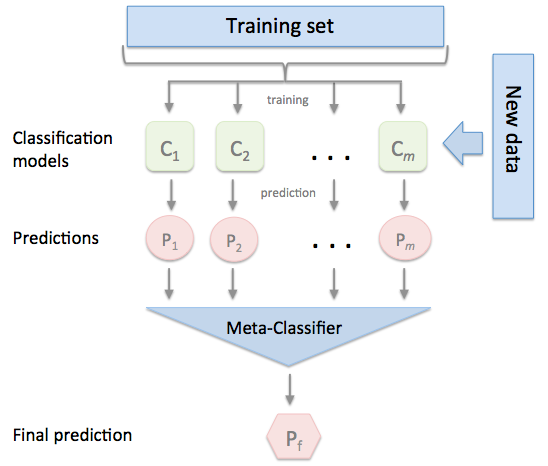

## How Stacking works?
* First, the training set is split in two subsets. 
* The first subset is used to train the predictors in the first layer
* Next, the first layer predictors are used to make predictions on the second (held-out) set
* This ensures that the predictions are “clean,” since the predictors never saw these instances during training.
* The meta-classifier is trained on this new training set, so it learns to predict the target value given the first layer’s predictions.


## Stacking with `mlxtend`

Sadly, stacking is not implemented in sklearn.

Scikit-Learn does not support stacking directly, luckily but it is not very hard to create your own stacking ensemble. Alternatively a python library called mlextend supports stacking and has very similar api as sklearn!

Check out the link for `Stacking` implementation in a python library called **[mlxtend](https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)**.

You can install it using the `pip` command: `pip install mlxtend`

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier() 
models = [log_clf, decision_tree_clf]

In [8]:
stacking_clf = StackingClassifier(classifiers = models,
                                 meta_classifier = decision_tree_clf)

stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.69729729729729728